<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Latihan_Scorecard_German.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

In [ ]:
# Memperbarui Library
!pip install scikit-learn --upgrade

import sklearn as skl
print(skl. __version__) 

# Lalu restart ulang runtime nya

1.0.1


# Membaca Data

## 2.3.2.1 Persiapan data dan impor ke Python

Impor data yang akan digunakan untuk membuat model

In [33]:
# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Dataset/german_credit_easy.xlsx?raw=true')

## # 2.3.2.3 Struktur data

In [34]:
# Melihat sample dari dataset
df.head(125) # Menampilkan 10 baris teratas dari dataframe df

,ID,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,ABC0001,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,ABC0002,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,ABC0003,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,ABC0004,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,ABC0005,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,ABC0121,1,< 0 DM,21,existing credits paid back duly till now,domestic appliances,1835,... < 100 DM,1 <= ... < 4 years,3,female : divorced/separated/married,none,2,real estate,25,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
121,ABC0122,0,no checking account,24,critical account/ other credits existing (not ...,car (used),3868,... < 100 DM,.. >= 7 years,4,female : divorced/separated/married,none,2,"if not A121/A122 : car or other, not in attrib...",41,none,rent,2,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
122,ABC0123,0,no checking account,12,existing credits paid back duly till now,radio/television,1768,... < 100 DM,1 <= ... < 4 years,3,male : single,none,2,real estate,24,none,rent,1,unskilled - resident,1,none,yes
123,ABC0124,0,>= 200 DM / salary assignments for at least 1 ...,10,critical account/ other credits existing (not ...,car (new),781,... < 100 DM,.. >= 7 years,4,male : single,none,4,unknown / no property,63,none,for free,2,skilled employee / official,1,"yes, registered under the customers name",yes


In [35]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   default                     1000 non-null   int64 
 2   account_check_status        1000 non-null   object
 3   duration_in_month           1000 non-null   int64 
 4   credit_history              1000 non-null   object
 5   purpose                     1000 non-null   object
 6   credit_amount               1000 non-null   int64 
 7   savings                     1000 non-null   object
 8   present_emp_since           1000 non-null   object
 9   installment_as_income_perc  1000 non-null   int64 
 10  personal_status_sex         1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_res_since           1000 non-null   int64 
 13  property                    1000 non-null   objec

## Mengubah Tipe Data

In [36]:
df['present_emp_since'] = df.present_emp_since.astype('object')
df['present_res_since'] = df.present_res_since.astype('object')
df['people_under_maintenance'] = df.people_under_maintenance.astype('object')
df['credits_this_bank'] = df.credits_this_bank.astype('object')
df['installment_as_income_perc'] = df.installment_as_income_perc.astype('object')

# Missing Data Treatment (Apa yang harus dilakukan terhadap data yang kosong?)

## # 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)


In [37]:
# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [38]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan
# terjadi baris data yang kosong lagi

df_clean = df_pembersihan_2

In [39]:
# Menghapus indeks dari data yang telah dibuang
# Langkah ini harus dilakukan karena penghapusan baris telah dilakukan, tapi indeks belum direset
# Pembaca dapat verifikasi perbedaan total indeks sebelum dan sesudah reset, dengan menggunakan info
# Jika reset tidak dilakukan, bisa terjadi kesalahan data di langkah-langkah berikutnya

df_clean = df_clean.reset_index(drop=True)

# Data Eksplorasi (Explanatory Data Analysis atau EDA)

## 2.3.2.5.5.1 EDA Analisa dasar variabel untuk default

In [16]:
# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['default'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['default'].value_counts(normalize=True) * 100)

0    700
1    300
Name: default, dtype: int64
0    70.0
1    30.0
Name: default, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk credit_history


In [17]:
# Untuk melihat frekuensi dari variabel credit_history
print(df_clean['credit_history'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel credit_history
print(df_clean['credit_history'].value_counts(normalize=True) * 100)

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64
existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [18]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK credit_history
print(pd.crosstab(df_clean['credit_history'], df_clean['default']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['credit_history'],df_clean['default'],normalize='index',)*100)

default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25
default                                                     0          1
credit_history                                                          
all credits at this bank paid back duly             42.857143  57.142857
critical account/ other credits existing (not a...  82.935154  17.064846
delay in paying off in the past                     68.181818  31.818182
existing credits paid back duly till now            68.113208  31.886792
no credits taken/ all credits paid back duly        37.500000  62.500000


## Latihan EDA untuk variabel kategori

In [ ]:
# Latihan EDA untuk variabel lainnya
# Tulis kode disini



## 2.3.2.5.5.3 Exploratory Data Analysis untuk Age

In [19]:
# Rangkuman statistik untuk variabel numerik Age
print(df_clean['age'].describe())

# Rangkuman statistik untuk variabel numerik Age, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('default')['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0
1,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

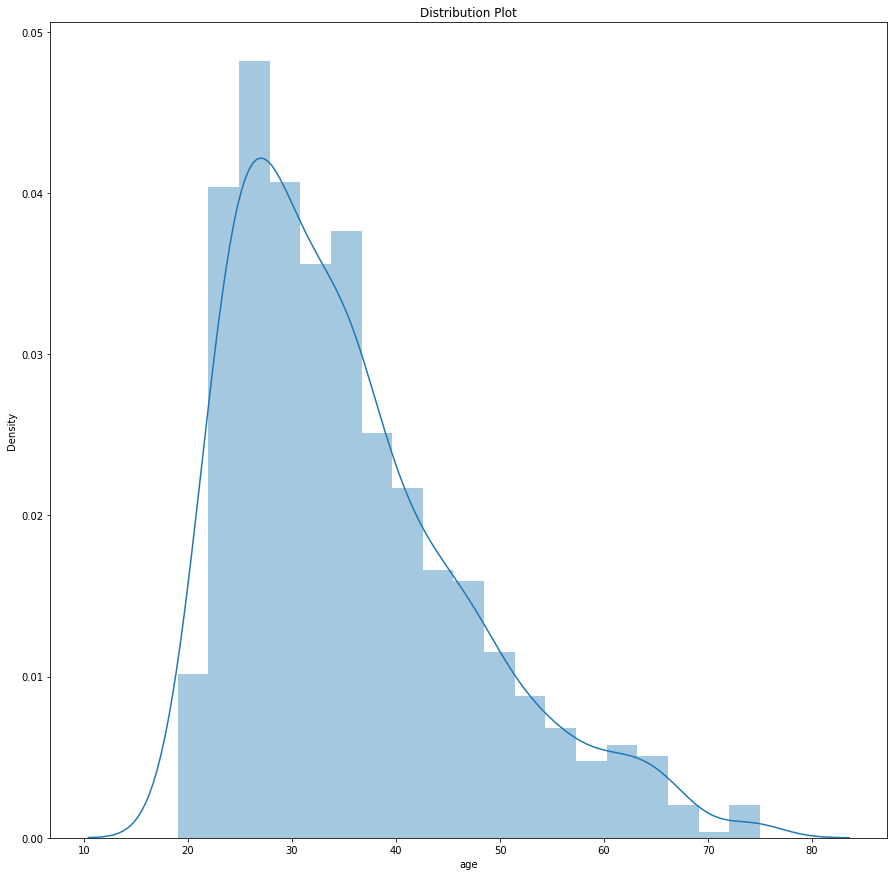

In [20]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['age'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


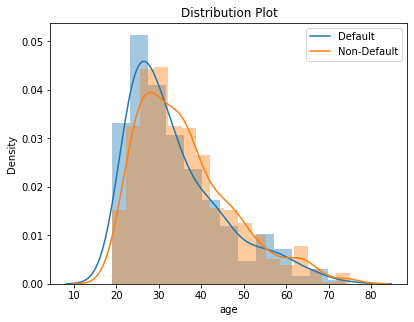

In [21]:
df_clean_0 = df_clean[df_clean.default == 0]
df_clean_1 = df_clean[df_clean.default == 1]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
sns.distplot(df_clean_1['age'], ax=ax).set_title('Distribution Plot') 
sns.distplot(df_clean_0['age'], ax=ax).set_title('Distribution Plot')
ax.legend(labels=["Default","Non-Default"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


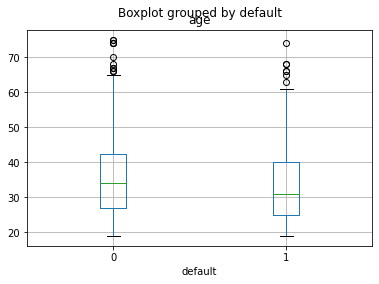

In [22]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='default',column=['age'])

## Latihan EDA untuk variabel Numerik

In [ ]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel numerik lainnya
# Tulis kode disini



## Korelasi

In [23]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['age']))

-0.09112740931949889


In [24]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# Usia dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].age,
             	df_clean[df_clean.default == 1].age, nan_policy='omit')

Ttest_indResult(statistic=2.890846677564194, pvalue=0.003925339398276282)

## 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

In [25]:
# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,default,duration_in_month,credit_amount,installment_as_income_perc,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.058266,0.021669,-0.071207
age,-0.091127,-0.036136,0.032716,0.058266,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.118201,0.109667,1.000000


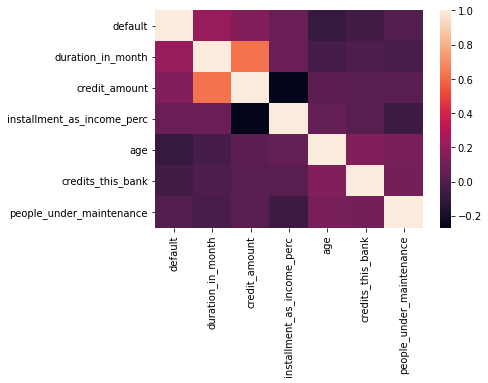

In [26]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Latihan Korelasi

In [ ]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [ ]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



## 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori


In [28]:
# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
resultant.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                                    account_check_status_0 <= ... < 200 DM  ...  foreign_worker_yes
account_check_status_0 <= ... < 200 DM                                        0.000000e+00  ...        1.096327e-01
account_check_status_< 0 DM                                                   1.002773e-23  ...        1.196944e-01
account_check_status_>= 200 DM / salary assignm...                            1.472699e-06  ...        2.652936e-01
account_check_status_no checking account                                      2.160989e-33  ...        6.736398e-01
credit_history_all credits at this bank paid ba...                            5.578735e-01  ...        5.383645e-01
credit_history_critical account/ other credits ...                            1.702497e-03  ...        3.282270e-01
credit_history_delay in paying off in the past                                6.465593e-03  ...        6.594800e-02
credit_history_existing credits paid back duly ...                      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecard dengan Library scorecardpy

## Instalasi library

In [29]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 2.2 MB/s 


## Memilih variabel

In [68]:
#  ada variabel yang aneh: installment_as_income_perc, ,'present_res_since','credits_this_bank,people_under_maintenance
df_all = df_clean.drop(columns=['ID','installment_as_income_perc'])
df_all = df_clean [['default','account_check_status','duration_in_month','credit_history','purpose'
                  ,'credit_amount','savings','present_emp_since','personal_status_sex','other_debtors'
                  ,'property','age','other_installment_plans','housing','job','telephone','foreign_worker'
                  ]]

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   default                     1000 non-null   int64 
 2   account_check_status        1000 non-null   object
 3   duration_in_month           1000 non-null   int64 
 4   credit_history              1000 non-null   object
 5   purpose                     1000 non-null   object
 6   credit_amount               1000 non-null   int64 
 7   savings                     1000 non-null   object
 8   present_emp_since           1000 non-null   object
 9   installment_as_income_perc  1000 non-null   object
 10  personal_status_sex         1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_res_since           1000 non-null   object
 13  property                    1000 non-null   objec

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'account_check_status': <Figure size 432x288 with 2 Axes>,
 'age': <Figure size 432x288 with 2 Axes>,
 'credit_amount': <Figure size 432x288 with 2 Axes>,
 'credit_history': <Figure size 432x288 with 2 Axes>,
 'duration_in_month': <Figure size 432x288 with 2 Axes>,
 'foreign_worker': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'job': <Figure size 432x288 with 2 Axes>,
 'other_debtors': <Figure size 432x288 with 2 Axes>,
 'other_installment_plans': <Figure size 432x288 with 2 Axes>,
 'personal_status_sex': <Figure size 432x288 with 2 Axes>,
 'present_emp_since': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'savings': <Figure size 432x288 with 2 Axes>,
 'telephone': <Figure size 432x288 with 2 Axes>}

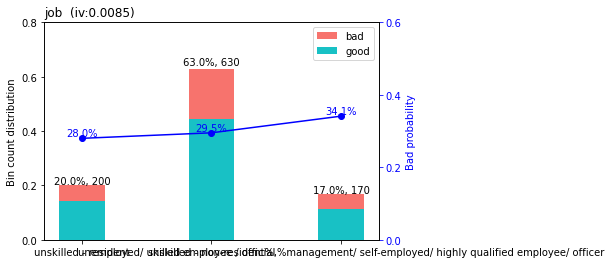

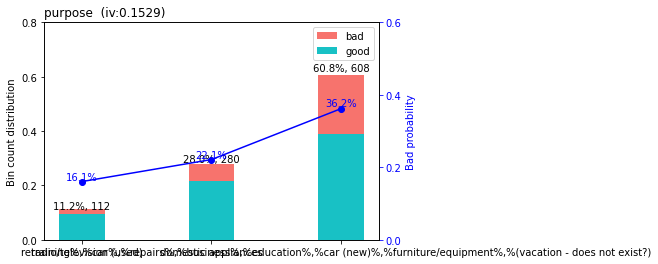

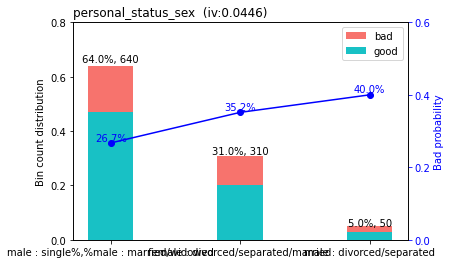

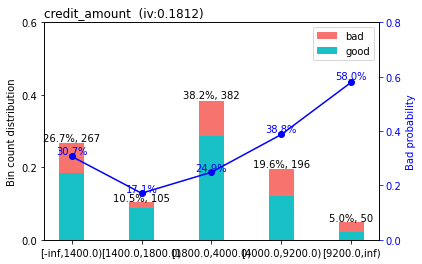

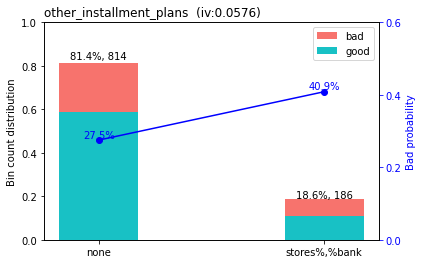

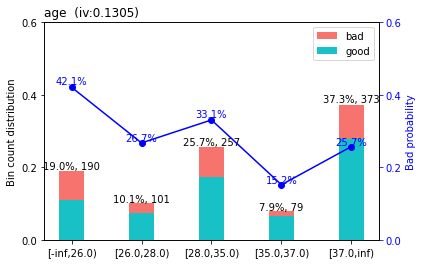

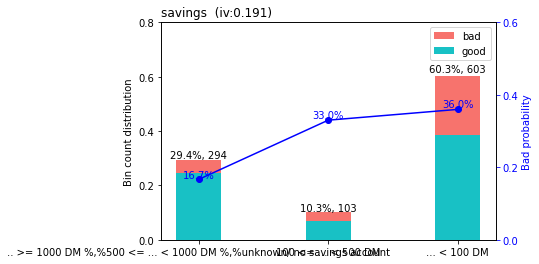

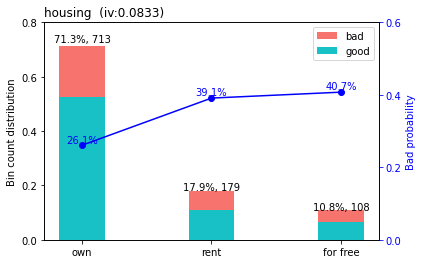

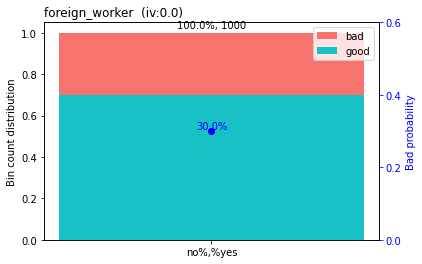

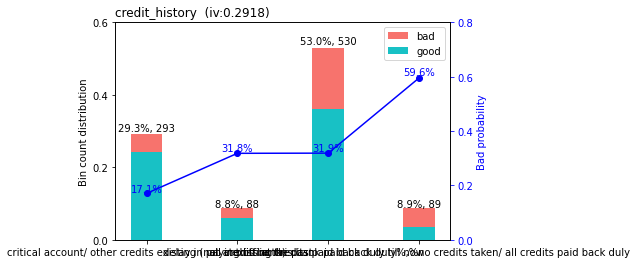

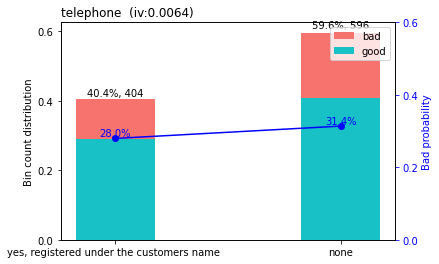

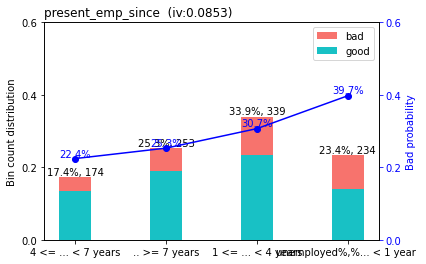

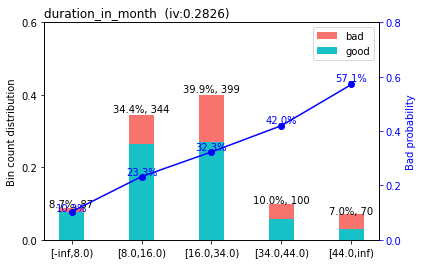

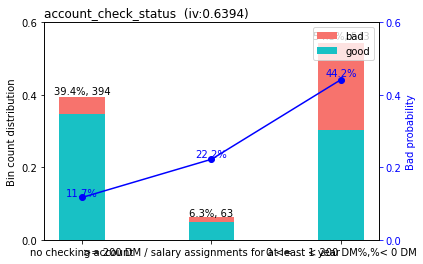

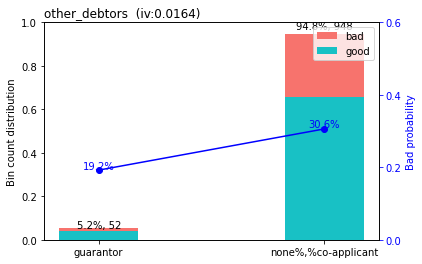

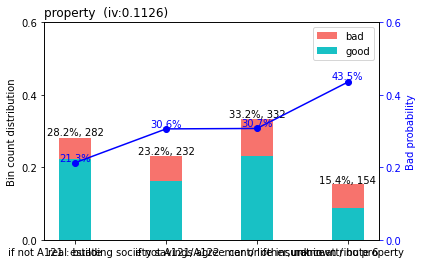

In [69]:
y = df_all.loc[:,'default']
X = df_all.loc[:,df_all.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_all, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
}
bins_adj = scpy.woebin(df_all, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

## Pembuatan WOE secara otomatis

In [70]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
      job_woe  foreign_worker_woe  ...  property_woe  housing_woe
0   -0.022780                 0.0  ...      0.586082     0.472604
1    0.189242                 0.0  ...      0.034191    -0.194156
2   -0.022780                 0.0  ...      0.028573     0.404445
3   -0.097164                 0.0  ...     -0.461035    -0.194156
4    0.189242                 0.0  ...      0.034191    -0.194156
..        ...                 ...  ...           ...          ...
695  0.189242                 0.0  ...      0.586082    -0.194156
696 -0.022780                 0.0  ...      0.028573    -0.194156
697 -0.022780                 0.0  ...     -0.461035    -0.194156
698 -0.022780                 0.0  ...     -0.461035    -0.194156
699 -0.022780                 0.0  ...     -0.461035    -0.194156

[700 rows x 16 columns]
0      0
1      0
2      0
3      0
4      0
      ..
695    1
696    0
697    0
698    1
699    0
Name: de

## Model dengan logistic regression dan hasil Scorecard

In [72]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['job_woe' 'foreign_worker_woe' 'credit_history_woe' 'purpose_woe'
 'other_installment_plans_woe' 'present_emp_since_woe' 'telephone_woe'
 'personal_status_sex_woe' 'credit_amount_woe' 'duration_in_month_woe'
 'age_woe' 'savings_woe' 'account_check_status_woe' 'other_debtors_woe'
 'property_woe' 'housing_woe'] [[-0.18073352  0.          0.68855732  0.84751739  0.4236357   0.32847133
   0.699496    0.45219718  0.74331884  0.54055048  0.84806993  0.6016163
   0.68274284  0.66246787  0.58566094  0.46019718]]
Intercept:  [-0.84981742]


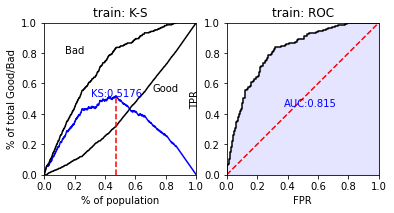

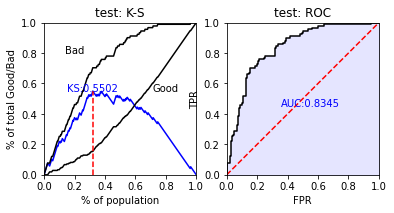

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


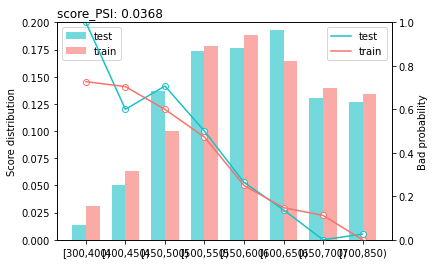

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.036759}

In [73]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
df_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
train_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_scorecard.to_csv('train_scorecard.csv') 
files.download('train_scorecard.csv')

test_score.to_csv('test_score.csv') 
files.download('test_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecardpy hanya dengan tiga variabel dengan IV tertinggi

## Memilih variabel

In [75]:
#  ada variabel yang aneh: installment_as_income_perc, ,'present_res_since','credits_this_bank,people_under_maintenance
df_3_var = df_clean [['default','account_check_status','duration_in_month','credit_history']]

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'account_check_status': <Figure size 432x288 with 2 Axes>,
 'credit_history': <Figure size 432x288 with 2 Axes>,
 'duration_in_month': <Figure size 432x288 with 2 Axes>}

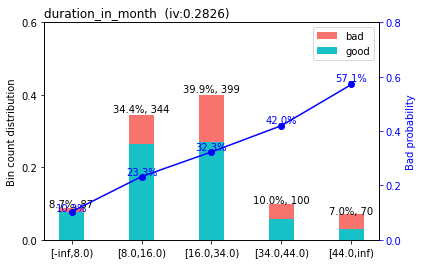

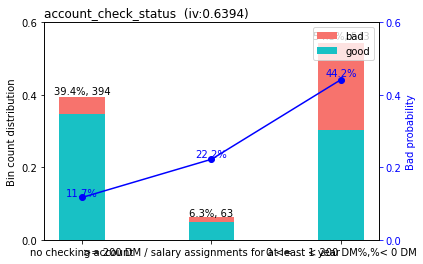

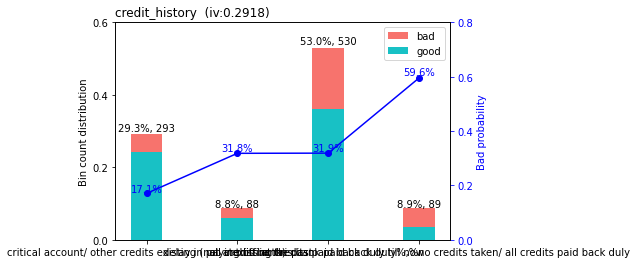

In [76]:
y = df_3_var.loc[:,'default']
X = df_3_var.loc[:,df_3_var.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_3_var, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
}
bins_adj = scpy.woebin(df_3_var, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

## Pembuatan WOE secara otomatis

In [77]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
     duration_in_month_woe  account_check_status_woe  credit_history_woe
0                 0.108688                 -1.176263            0.085158
1                -0.346625                 -1.176263            0.088319
2                 0.108688                  0.614204            0.088319
3                -0.346625                  0.614204           -0.733741
4                 0.524524                 -1.176263           -0.733741
..                     ...                       ...                 ...
695               0.108688                 -1.176263            1.234071
696               0.108688                 -1.176263            0.088319
697               0.108688                 -1.176263           -0.733741
698              -0.346625                  0.614204            0.088319
699              -1.312186                 -1.176263            0.085158

[700 rows x 3 columns]
0      0
1      0
2     

## Model dengan logistic regression dan hasil Scorecard

In [78]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['duration_in_month_woe' 'account_check_status_woe' 'credit_history_woe'] [[0.80356522 0.81326348 0.77595338]]
Intercept:  [-0.85574828]


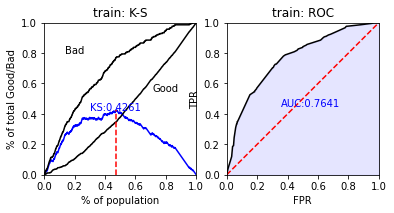

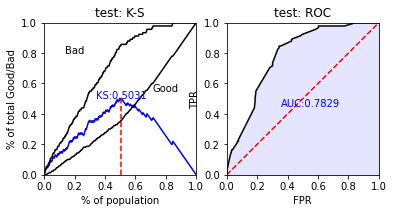

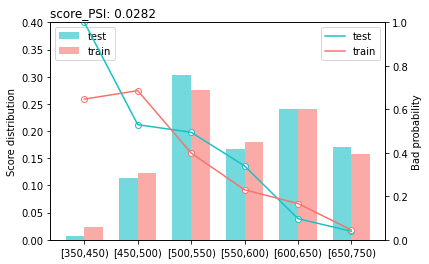

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable      PSI
 0    score  0.02822}

In [79]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
df_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
train_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_scorecard.to_csv('train_scorecard.csv') 
files.download('train_scorecard.csv')

test_score.to_csv('test_score.csv') 
files.download('test_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard


In [80]:
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan
df_woe_iv = (pd.crosstab(df_clean['account_check_status'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

df_woe_iv = (pd.crosstab(df_clean['duration_in_month'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

df_woe_iv = (pd.crosstab(df_clean['credit_history'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                                                    0  ...        iv
account_check_status                                          ...          
0 <= ... < 200 DM                                   0.234286  ...  0.666012
< 0 DM                                              0.198571  ...  0.666012
>= 200 DM / salary assignments for at least 1 year  0.070000  ...  0.666012
no checking account                                 0.497143  ...  0.666012

[4 rows x 4 columns]
default                   0         1       woe   iv
duration_in_month                                   
4                  0.008571  0.000000      -inf  inf
5                  0.001429  0.000000      -inf  inf
6                  0.094286  0.030000 -1.145132  inf
7                  0.007143  0.000000      -inf  inf
8                  0.008571  0.003333 -0.944462  inf
9                  0.050000  0.046667 -0.068993  inf
10                 0.035714  0.010000 -1.272966  inf
11                 0.012857  0.000000      -i

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [84]:
pd.crosstab(df_clean['account_check_status'],df_clean['default'])

default,0,1
account_check_status,,
0 <= ... < 200 DM,164,105
< 0 DM,139,135
>= 200 DM / salary assignments for at least 1 year,49,14
no checking account,348,46


In [85]:
pd.crosstab(df_clean['duration_in_month'],df_clean['default'])

default,0,1
duration_in_month,,
4,6,0
5,1,0
6,66,9
7,5,0
8,6,1
9,35,14
10,25,3
11,9,0
12,130,49


In [86]:
pd.crosstab(df_clean['credit_history'],df_clean['default'])

default,0,1
credit_history,,
all credits at this bank paid back duly,21,28
critical account/ other credits existing (not at this bank),243,50
delay in paying off in the past,60,28
existing credits paid back duly till now,361,169
no credits taken/ all credits paid back duly,15,25


In [ ]:
# Variabel account_check_status

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          'Kolek 1',
          'Kolek 2&3',
          'Kolek 4&5',
          'Kolek Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.8405,
          0.0814,
          1.1392,
          1.0023
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

Kolek 2&3                59.810127
Kolek 1                  28.481013
Kolek 4&5                 6.540084
Kolek Tidak_Ditemukan     5.168776
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
Kolek 1                  0.341791  0.147482 -0.840493  0.324191
Kolek 2&3                0.583582  0.633094  0.081433  0.324191
Kolek 4&5                0.040299  0.125899  1.139168  0.324191
Kolek Tidak_Ditemukan    0.034328  0.093525  1.002259  0.324191


In [ ]:
# Variabel duration_in_month dengan WOE dan IV yang belum dioptimumkan

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          '01.<=23',
          '02.24-26',
          '03.27-28',
          '04.29-31',
          '05.32-34',
          '06.35-37',
          '07.38-42',
          '08.43-48',
          '09.49-55',
          '10.>=56'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

02.24-26    13.924051
07.38-42    11.392405
04.29-31    11.181435
06.35-37    10.654008
01.<=23     10.548523
05.32-34     9.704641
08.43-48     9.704641
03.27-28     9.071730
10.>=56      6.962025
09.49-55     6.856540
Name: Usia_Bin, dtype: float64
default    0   1
Usia_Bin        
01.<=23   60  40
02.24-26  82  50
03.27-28  62  24
04.29-31  75  31
05.32-34  63  29
06.35-37  83  18
07.38-42  80  28
08.43-48  68  24
09.49-55  50  15
10.>=56   47  19
default          0         1       woe        iv
Usia_Bin                                        
01.<=23   0.089552  0.143885  0.474191  0.100136
02.24-26  0.122388  0.179856  0.384960  0.100136
03.27-28  0.092537  0.086331 -0.069424  0.100136
04.29-31  0.111940  0.111511 -0.003844  0.100136
05.32-34  0.094030  0.104317  0.103818  0.100136
06.35-37  0.123881  0.064748 -0.648812  0.100136
07.38-42  0.119403  0.100719 -0.170166  0.100136
08.43-48  0.101493  0.086331 -0.161797  0.100136
09.49-55  0.074627  0.053957 -0.324316  0.100136
10.>=5

In [ ]:
# Variabel duration_in_month dengan WOE dan IV yang dioptimumkan

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 34),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          '1.<=23',
          '2.24-34',
          '3.35-55',
          '4.>=56'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 34),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          0.474191,
          0.135589,
          -0.316047,
          -0.026052
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

2.24-34    43.881857
3.35-55    38.607595
1.<=23     10.548523
4.>=56      6.962025
Name: Usia_Bin, dtype: float64
default     0    1
Usia_Bin          
1.<=23     60   40
2.24-34   282  134
3.35-55   281   85
4.>=56     47   19
default          0         1       woe        iv
Usia_Bin                                        
1.<=23    0.089552  0.143885  0.474191  0.070016
2.24-34   0.420896  0.482014  0.135589  0.070016
3.35-55   0.419403  0.305755 -0.316047  0.070016
4.>=56    0.070149  0.068345 -0.026052  0.070016


In [ ]:
# Variabel credit_history

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          '1.pendidikan',
          '2.buka_bisnis',
          '3.liburan',
          '4.elektronik',
          '5.peralatan_rumahtangga',
          '6.makanan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          -0.8,
          -0.5,
          -0.3,
          0.4,
          0.5,
          0.8
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)


elektronik               43.037975
buka_bisnis              18.670886
makanan                  10.970464
peralatan_rumahtangga    10.864979
liburan                   8.649789
pendidikan                7.805907
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe        iv
Tujuan_Pinjaman                                              
buka_bisnis            0.200000  0.154676 -0.256983  0.068185
elektronik             0.425373  0.442446  0.039352  0.068185
liburan                0.089552  0.079137 -0.123646  0.068185
makanan                0.092537  0.151079  0.490192  0.068185
pendidikan             0.089552  0.050360 -0.575631  0.068185
peralatan_rumahtangga  0.102985  0.122302  0.171911  0.068185
default                    0    1
Tujuan_Pinjaman_Bin              
1.pendidikan              60   14
2.buka_bisnis            134   43
3.liburan                 60   22
4.elektronik             285  123
5.peralatan_rumahtangga   69   34
6.makanan         

# Proses Modeling

## Persiapan membuat model: Memilih Variabel Input

In [ ]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model
# Contoh hanya menggunakan 3 variabel input saja: 

df_model_WOE = df_clean[['default','account_check_status','duration_in_month','credit_history']]
df_model_Bin = df_clean[['default','account_check_status','duration_in_month','credit_history']]
df_model = df_clean[['default','account_check_status','duration_in_month','credit_history']]

In [ ]:
# Dalam contoh ini tidak ada oversampling/undersampling

## Membagi dataset menjadi train dan test

In [ ]:
# Membagi dataset menjadi development(train) dan test

y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Modeling dengan logistic regression

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)
print(lr.classes_)

# Jika ingin mengetahui detail dari regresi logistik
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

Coefficient:  ['SLIK_Kolektibilitas_WOE' 'DBR_WOE' 'Usia_WOE'] [[0.86139349 0.87926071 0.42979569]]
Intercept:  [-0.82758583]
[0 1]
Optimization terminated successfully.
         Current function value: 0.606180
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                0.003675
Time:                        16:48:44   Log-Likelihood:                -401.90
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                    0.2271
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SLIK_Kolektibilitas_WOE     0.9444      0.159      5.928      0.000       0.632       1.257
DBR_WOE                     0.9797      0.138      7.084      0.000       0.709       1.251
Usia_WOE                    0.4661      0.324      1.438      0.150      -0.169       1.101
===========================================================================================
"""

In [ ]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
print(test_predict)
# Cara adalah 0 jika bayar, dan 1 jika default

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
test_pred_proba = lr.predict_proba(X_test)
print(test_pred_proba)
# Cara bacanya adalah 0.635 adalah probabilitas 0 dan 0.364 adaalah probabilitas 1
# Dengan mengacu probabilitas 1 diatas 0.5 maka default / 1

[[0.76128807 0.23871193]
 [0.68196331 0.31803669]
 [0.47826863 0.52173137]
 [0.80812584 0.19187416]
 [0.68196331 0.31803669]
 [0.79712241 0.20287759]
 [0.70112653 0.29887347]
 [0.71616446 0.28383554]
 [0.63975174 0.36024826]
 [0.80455626 0.19544374]
 [0.88731536 0.11268464]
 [0.87586834 0.12413166]
 [0.69804444 0.30195556]
 [0.8332905  0.1667095 ]
 [0.76128807 0.23871193]
 [0.7806552  0.2193448 ]
 [0.74015595 0.25984405]
 [0.68196331 0.31803669]
 [0.56283126 0.43716874]
 [0.28760935 0.71239065]
 [0.80455626 0.19544374]
 [0.80455626 0.19544374]
 [0.24952739 0.75047261]
 [0.80455626 0.19544374]
 [0.68196331 0.31803669]
 [0.84808163 0.15191837]
 [0.74015595 0.25984405]
 [0.64241789 0.35758211]
 [0.83567593 0.16432407]
 [0.66976854 0.33023146]
 [0.68196331 0.31803669]
 [0.68317425 0.31682575]
 [0.24952739 0.75047261]
 [0.80455626 0.19544374]
 [0.91707466 0.08292534]
 [0.74015595 0.25984405]
 [0.63975174 0.36024826]
 [0.28760935 0.71239065]
 [0.80455626 0.19544374]
 [0.56283126 0.43716874]


In [ ]:
# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, test_predict))
conf_mat = confusion_matrix(y_true=y_test, y_pred=test_predict)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, test_pred_proba[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       204
           1       0.66      0.28      0.40        81

    accuracy                           0.75       285
   macro avg       0.71      0.61      0.62       285
weighted avg       0.74      0.75      0.72       285

Confusion matrix:
 [[192  12]
 [ 58  23]]
ROC Score: 0.7135378842895184


## Modeling logistic regression dengan Stepwise

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LogisticRegression()
lr.fit(X_train, y_train)

feature_names = np.array(X.columns)

sfs_backward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="backward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise backward: ', feature_names[sfs_backward.get_support()]
)

sfs_forward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="forward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise forward: ', feature_names[sfs_forward.get_support()]
)

Variabel signifikan stepwise backward:  ['SLIK_Kolektibilitas_WOE']
Variabel signifikan stepwise forward:  ['SLIK_Kolektibilitas_WOE']


In [ ]:
# Testing hasil stepwise

df_step = df_clean[['SLIK_Kolektibilitas_WOE','DBR_WOE','Usia_WOE','Mobile_Provider_WOE','Device_Apps_Installed_WOE'
                  ,'Mobile_Number_Active_Since_WOE','default'
                  ]]

# Membagi dataset menjadi development(train) dan test

y_step = df_step.loc[:,'default']
X_step = df_step.loc[:,df_step.columns != 'default']

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.30, random_state=42)

lr_step = LogisticRegression()
lr_step.fit(X_train_step, y_train_step)

test_predict_step = lr_step.predict(X_test_step)
test_pred_proba_step = lr_step.predict_proba(X_test_step)

# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test_step, test_predict_step))
conf_mat = confusion_matrix(y_true=y_test_step, y_pred=test_predict_step)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test_step, test_pred_proba_step[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       204
           1       0.71      0.46      0.56        81

    accuracy                           0.79       285
   macro avg       0.76      0.69      0.71       285
weighted avg       0.78      0.79      0.78       285

Confusion matrix:
 [[189  15]
 [ 44  37]]
ROC Score: 0.7784132171387074


## Membuat Scoring dari probabilitas

In [ ]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1/4 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

In [ ]:
# Perhitungan manual untuk data train
train_pred_proba = lr.predict_proba(X_train)[:,1]
score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_scoring_manual = pd.concat([df_train, df_train_pred_proba, df_train_score], axis = 1)

# Perhitungan manual untuk data test
test_pred_proba = lr.predict_proba(X_test)[:,1]
score = A - B*np.log(test_pred_proba/(1-test_pred_proba))
df_test_pred_proba = pd.DataFrame(test_pred_proba, columns=['test_pred_proba'])
df_test_score = pd.DataFrame(score, columns=['Score'])
df_test_scoring_manual = pd.concat([df_test, df_test_pred_proba, df_test_score], axis = 1)

In [ ]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train_scoring_manual.to_csv('df_train_scoring_manual.csv') 
files.download('df_train_scoring_manual.csv')

df_test_scoring_manual.to_csv('df_test_scoring_manual.csv') 
files.download('df_test_scoring_manual.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>